In [ ]:
import pandas as pd
import numpy as np
import time
from nltk.tokenize import word_tokenize
import cv2
import matplotlib.pyplot as plt
import torch
import nltk
import re
from sklearn.preprocessing import LabelEncoder
import spacy
from spacy.tokenizer import Tokenizer
from PIL import Image
import torch.optim as optim
import os
from skimage import io
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification


# Read The Data

In [ ]:
data  = pd.read_csv('Data_labels.csv')
data

,Image_name,level
0,IMG_1,4
1,IMG_2,4
2,IMG_3,4
3,IMG_4,4
4,IMG_5,4
...,...,...
511,IMG_512,2
512,IMG_513,2
513,IMG_514,2
514,IMG_515,2


In [ ]:
(X_train, Y_train), (X_test, Y_test) = data

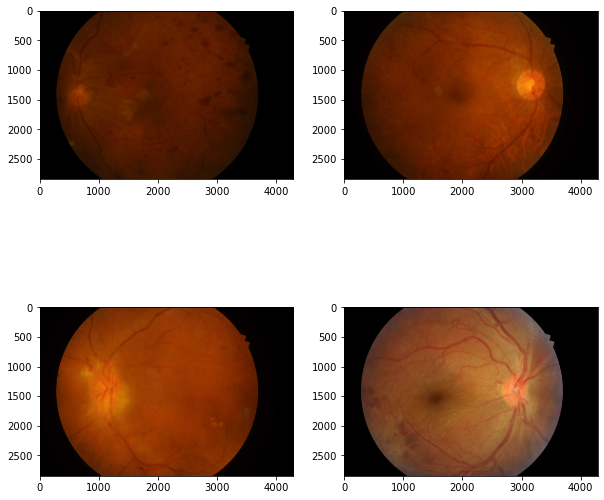

In [ ]:
from PIL import Image
f, axarr = plt.subplots(2,2, figsize=(10, 10))
axarr[0,0].imshow(Image.open("Images/IMG_1.jpg"))
axarr[0,1].imshow(Image.open("Images/IMG_2.jpg"))
axarr[1,0].imshow(Image.open("Images/IMG_3.jpg"))
axarr[1,1].imshow(Image.open("Images/IMG_4.jpg"))


In [ ]:
import os
import cv2

In [ ]:
file_of_image = os.listdir("Images")

path_of_images = "Images/"

image = []

counttt = 0


for i in file_of_image:
    
    file_images = cv2.imread(path_of_images + i)
    
    image.append(cv2.resize(file_images, (32,32)))
    
   
    counttt += 1

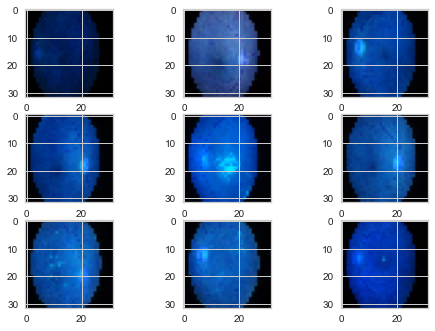

In [ ]:
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(image[i])

# Sampling

In [ ]:
print("Dimensions Of The Each Image Before Clustering The Image:")
for i in image:
    i.shape
    print(i.shape)   

Dimensions Of The Each Image Before Clustering The Image:
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 3

# convert it into a two-dimensional array with the length being the 852*728 and width (3) as the RGB value.

In [ ]:
for i in image:
    x, y, z = i.shape
    image_2d = i.reshape(x*y, z)
    image_2d.shape
    print(image_2d.shape)

(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)
(1024, 3)


In [ ]:
from sklearn import cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

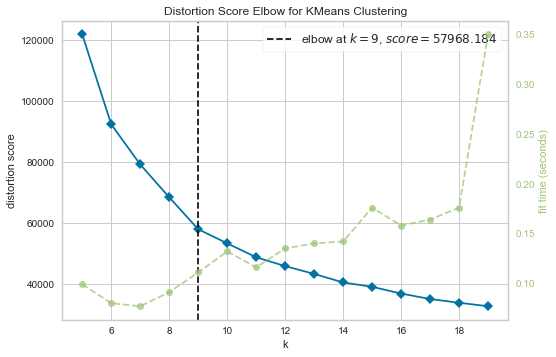

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (5, 20))

visualizer.fit(np.array(image_2d))
visualizer.show()

In [ ]:
k = visualizer.elbow_value_
print(k)

9


In [ ]:
kmeans_cluster = cluster.KMeans(n_clusters = k)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

# Segmentation

In [ ]:
segmented_image = cluster_centers[image_2d.flatten()]
segmented_image = segmented_image.reshape((224,224))

# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [9]:
Y_pred = KNN.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
Accuracy_of_KNN = (accuracy_score(Y_pred, Y_test)) * 100
print ("Accuracy of KNN Model:", Accuracy_of_KNN)

Accuracy of KNN Model: 33.98


In [12]:
from sklearn.metrics import recall_score

In [13]:
Recall_Score_of_KNN = recall_score(Y_test, Y_pred, average='macro')*100
print ("Recall Score of KNN Model:", Recall_Score_of_KNN)

Recall Score of KNN Model: 33.98


In [14]:
from sklearn.metrics import precision_score

In [15]:
Precision_Score_of_KNN = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of KNN Model:", Precision_Score_of_KNN)

Precision Score of KNN Model: 43.042618255284964


In [16]:
from sklearn.metrics import f1_scorefrom sklearn.metrics import f1_score

Precision Score of KNN Model: 43.042618255284964


In [17]:
from sklearn.metrics import f1_score

In [18]:
F1_Score_of_KNN = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of KNN Model:", F1_Score_of_KNN)

F1 Score of KNN Model: 32.60170986061005


# Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [21]:
Y_pred = Random_Forest_Classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
Accuracy_of_Random_Forest_Classifier = accuracy_score(Y_test, Y_pred) * 100
print ("Accuracy of Random Forest Classifier Model:", Accuracy_of_Random_Forest_Classifier)

Accuracy of Random Forest Classifier Model: 47.22


In [24]:
from sklearn.metrics import recall_score

In [25]:
Recall_Score_of_Random_Forest_Classifier = recall_score(Y_test, Y_pred, average='macro') * 100
print ("Recall Score of Random Forest Classifier Model:", Recall_Score_of_Random_Forest_Classifier)

Recall Score of Random Forest Classifier Model: 47.22


In [26]:
from sklearn.metrics import precision_score

In [27]:
Precision_Score_of_Random_Forest_Classifier = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of Random Forest Classifier Model:", Precision_Score_of_Random_Forest_Classifier)

Precision Score of Random Forest Classifier Model: 46.81346621794903


In [28]:
from sklearn.metrics import f1_score

In [29]:
F1_Score_of_Random_Forest_Classifier = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of Random Forest Classifier Model:", F1_Score_of_Random_Forest_Classifier)

F1 Score of Random Forest Classifier Model: 46.853582351334374


Comparsion Between  KNN And Random Forest Classifier Model

In [30]:
print("Accuray of KNN Model: ", Accuracy_of_KNN)
print("Accuray of Random Forest Classifier Model: ", Accuracy_of_Random_Forest_Classifier)

Accuray of KNN Model:  33.98
Accuray of Random Forest Classifier Model:  47.22


In [32]:
x = ['KNN','Random Forest Classifier']
y = [Accuracy_of_KNN, Accuracy_of_Random_Forest_Classifier]
y

[33.98, 47.22]

In [34]:
import matplotlib.pyplot as plt

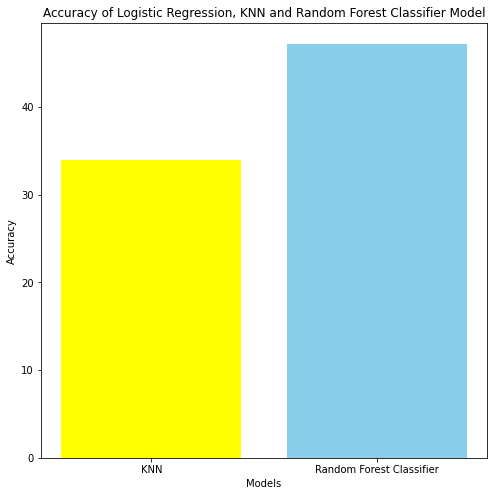

In [35]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['yellow', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Accuracy of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [38]:
print("Recall Score of KNN Model: ", Recall_Score_of_KNN)
print("Recall Score of Random Forest Classifier Model:", Recall_Score_of_Random_Forest_Classifier)


Recall Score of KNN Model:  33.98
Recall Score of Random Forest Classifier Model: 47.22


In [41]:
x = ['KNN','Random Forest Classifier']
y = [Recall_Score_of_KNN, Recall_Score_of_Random_Forest_Classifier]
y

[33.98, 47.22]

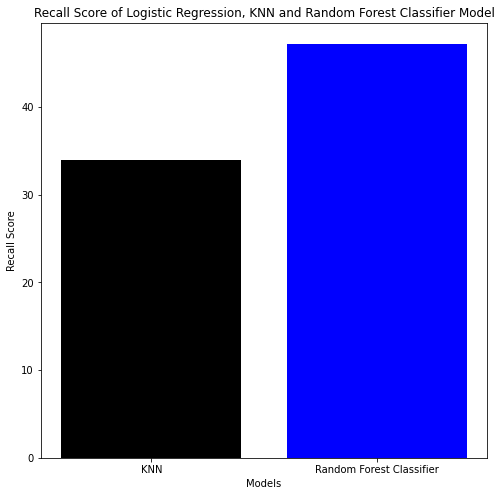

In [42]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['black', 'blue'])
plt.xlabel('Models')
plt.ylabel("Recall Score")
plt.title("Recall Score of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [43]:
print("Precision Score of KNN Model: ", Precision_Score_of_KNN)
print ("Precision Score of Random Forest Classifier Model:", Precision_Score_of_Random_Forest_Classifier)

Precision Score of KNN Model:  43.042618255284964
Precision Score of Random Forest Classifier Model: 46.81346621794903


In [44]:
x = ['KNN','Random Forest Classifier']
y = [Precision_Score_of_KNN, Precision_Score_of_Random_Forest_Classifier]
y

[43.042618255284964, 46.81346621794903]

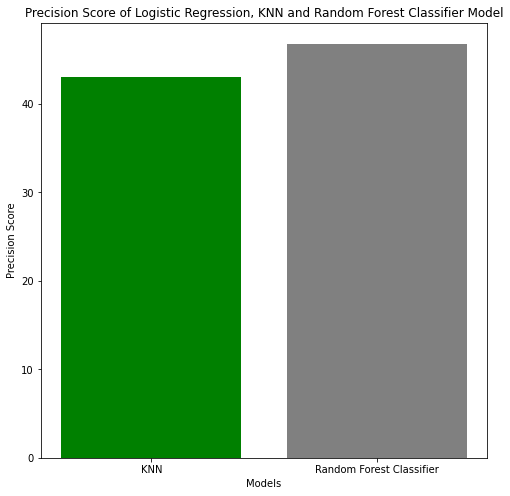

In [45]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['green', 'grey',])
plt.xlabel('Models')
plt.ylabel("Precision Score")
plt.title("Precision Score of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [ ]:
unsegmentedaccuracy = []
segmentedaccuracy = []
timesegmented = []
untimesegmented = []

# ANN

In [ ]:
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(torch.Tensor([0.4, 0.5, 0.5]), torch.Tensor([0.4, 0.5, 0.5]))])
dataset = SDS(csv_file = df, root_dir = 'Images/', transform = transform)
train_set, test_set = torch.utils.data.random_split(dataset, [len(dataset) - 73, 73])
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True)
test_loader = DataLoader(dataset = test_set, batch_size = 8, shuffle = True)

In [ ]:
class NNI(nn.Module):
    def __init__(self):
        super(NNI, self).__init__()
        self.flat = nn.Flatten()
        self.inn = nn.Linear(12288, 512)
        self.hidden1 = nn.Linear(512, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.outt = nn.Linear(64, 7)

    def forward(self, x):
        x = self.flat(x)
        x = torch.sigmoid(self.inn(x))
        x = torch.sigmoid(self.hidden1(x))
        x = torch.sigmoid(self.hidden2(x))
        x = torch.sigmoid(self.hidden3(x))
        x = self.outt(x)
      
        return x

# Unsegmented Image For ANN

In [ ]:
st = time.process_time()

net = NNI().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)
loss_list = []
tot_loss = 0
epochs = 10

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        z = net(inputs)
        loss = criterion(z, labels)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
        tot_loss += loss.data
        print(f'[{epoch+1}, {i+1:5d}] loss at each step: {tot_loss/len(loss_list)}')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        blank, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')
unsegmentedaccuracy.append(round(100 * correct / total))

TIME = time.process_time() - st
untimesegmented.append(TIME)

# Segmented Image For ANN

In [ ]:
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(torch.Tensor([0.4, 0.5, 0.5]), torch.Tensor([0.4, 0.5, 0.5]))])
dataset = SDS(csv_file = df, root_dir = 'Images/', transform = transform)
train_set, test_set = torch.utils.data.random_split(dataset, [len(dataset) - 73, 73])
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True)
test_loader = DataLoader(dataset = test_set, batch_size = 8, shuffle = True)

In [ ]:
start = time.process_time()

model = Convolutional_NN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

n_epochs = 10
loss_list = []
tot_loss = 0

for epoch in range(n_epochs):
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    model = Convolutional_NN()    
    inputs = inputs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    z=net(inputs)
    loss=criterion(z,labels)
    loss.backward()
    optimizer.step()

    loss_list.append(loss.data)
    tot_loss+=loss.data
    print(f'[{epoch+1}, {i+1:5d}] loss: {tot_loss/len(loss_list)}')

correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')
segmentedaccuracy.append(round(100 * correct / total))

TIME = time.process_time() - start
timesegmented.append(TIME)

# CNN

In [ ]:
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(torch.Tensor([0.4, 0.5, 0.5]), torch.Tensor([0.4, 0.5, 0.5]))])
dataset = SDS(csv_file = df, root_dir = 'Images/', transform = transform)
train_set, test_set = torch.utils.data.random_split(dataset, [len(dataset) - 73, 73])
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True)
test_loader = DataLoader(dataset = test_set, batch_size = 8, shuffle = True)

In [ ]:
class Convolutional_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride =1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, kernel_size=3, stride = 1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(), 
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 9)
            )
        
    def forward(self, x):
        return self.network(x)

# Usegmented Image For CNN

In [ ]:
st = time.process_time()

net = NNI().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)
loss_list = []
tot_loss = 0
epochs = 10

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        z = net(inputs)
        loss = criterion(z, labels)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
        tot_loss += loss.data
        print(f'[{epoch+1}, {i+1:5d}] loss at each step: {tot_loss/len(loss_list)}')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        blank, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')
unsegmentedaccuracy.append(round(100 * correct / total))

TIME = time.process_time() - st
untimesegmented.append(TIME)

# Segmented Image For CNN

In [ ]:
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(torch.Tensor([0.4, 0.5, 0.5]), torch.Tensor([0.4, 0.5, 0.5]))])
dataset = SDS(csv_file = df, root_dir = 'Images/', transform = transform)
train_set, test_set = torch.utils.data.random_split(dataset, [len(dataset) - 73, 73])
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True)
test_loader = DataLoader(dataset = test_set, batch_size = 8, shuffle = True)

In [ ]:
st = time.process_time()

net = NNI().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)
loss_list = []
tot_loss = 0
epochs = 10

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        z = net(inputs)
        loss = criterion(z, labels)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
        tot_loss += loss.data
        print(f'[{epoch+1}, {i+1:5d}] loss at each step: {tot_loss/len(loss_list)}')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        blank, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')
unsegmentedaccuracy.append(round(100 * correct / total))

TIME = time.process_time() - st
untimesegmented.append(TIME)